In [ ]:
import bocop
# solve (build and run) problem in local folder
bocop.solve('')

Loading solution:  /user/jfierrou/home/bocop/bocop/examples/han_model/problem_2000.sol


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


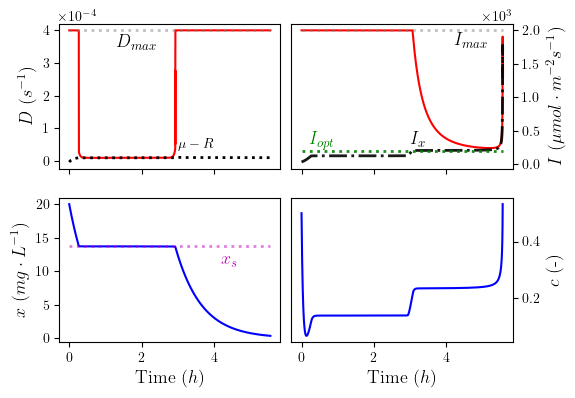

In [92]:
# plots 
import matplotlib.pyplot as plt
import numpy as np
import bocop
from scipy.optimize import root_scalar

A = 6  # Want figures to be A6
plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
plt.rcParams['text.usetex'] = True
plt.rc('font', family='serif')



sol = bocop.readSolution('/user/jfierrou/home/bocop/bocop/examples/han_model/problem_2000.sol')
costates = sol.costate


K = 8.7e-6
k_d = 2.99e-4
k_r = 6.8e-3
tau = 0.25
sigma = 4.7e-2
D_max = 4e-4
I_max = 2e3
xi = 0.2
R = 8e-6
I_opt = 1/(sigma*np.sqrt(k_d*tau/k_r))

# compute x_s
def fun(x):
    I_x = I_max*np.exp(-xi*x)
    denominator = (1+tau*sigma*I_x+k_d*tau*(sigma*I_x)**2/k_r)
    mu_s = K*sigma*I_x/denominator
    c_s = (k_d/k_r)*tau*(sigma*I_x)**2/denominator
    a_s = 1/denominator
    return R/mu_s+xi*x*(a_s-c_s)-1
x_s = root_scalar(fun, x0 = 5,x1 =20, method = 'secant').root


time = sol.time_steps/60/60# in hours
x = sol.state[0,:]
c = sol.state[1,:]
D = sol.control[0,:]; D = np.insert(D,0,D[0])
I = sol.control[1,:]; I =np.insert(I,0,I[0])
I_x = I*np.exp(-xi*x)
growth_rate = K*sigma*I*np.exp(-xi*x)*(1-c)/(1+tau*sigma*I*np.exp(-xi*x))


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharex = True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.2)

ax1.ticklabel_format(style = 'sci', scilimits=(-3,4), axis = 'y')
ax4.ticklabel_format(style = 'sci', scilimits=(-3,4), axis = 'y')
ax2.ticklabel_format(style = 'sci', scilimits=(0,1), axis = 'y')

ax1.set_ylabel(r'$D$ ($\displaystyle s^{-1}$)', fontsize = 13)
ax2.set_ylabel(r'$I$ ($\displaystyle\mu mol\cdot m^{-2}s^{-1}$)', fontsize = 13)
ax3.set_ylabel(r'$x$ ($\displaystyle mg\cdot L^{-1}$)', fontsize = 13)
ax4.set_ylabel(r'$c$ (-)', fontsize = 13)
ax3.set_xlabel(r'Time ($h$)', fontsize = 13)
ax4.set_xlabel(r'Time ($h$)', fontsize = 13)

ax2.yaxis.tick_right()
ax4.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax4.yaxis.set_label_position('right')

ax1.plot(time,D, color = 'red')
ax2.plot(time,I, color = 'red')
ax3.plot(time,x, color = 'blue')
ax4.plot(time,c, color = 'blue')

# Extra lines
ax3.hlines(y = x_s  , xmin = 0, xmax = time[-1], linestyles=':',linewidth = 2, alpha = 0.5, color ='m')
ax1.hlines(y = D_max, xmin = 0,  xmax = time[-1], linestyles= ':',linewidth = 2, alpha =0.5, color ='gray')
ax2.hlines(y = I_max, xmin = 0 , xmax = time[-1], linestyles = ':', linewidth =2 , alpha =0.5, color ='gray')
ax2.plot(time, I_x  , '-.', linewidth = 2, alpha = 0.9, color = 'black')
ax2.hlines(y = I_opt, xmin = 0, xmax = time[-1], linestyles=':', linewidth =2, alpha = 0.9, color = 'g')
ax1.plot(time, growth_rate - R, ':', color = 'k', linewidth =2)

ax1.text(3,0.4e-4, r'$\mu -R$', color = 'k')
ax1.text(1.3, 3.5e-4, r'$D_{max}$', fontsize = 13)
ax2.text(4.2, 1.78e3, r'$I_{max}$', fontsize = 13)
ax3.text(4.2, 11    , r'$x_s$'    , fontsize = 13, color = 'm')
ax2.text(0.2,300    , r'$I_{opt}$', fontsize = 13, color = 'g')
ax2.text(3,300    , r'$I_x$'    , fontsize = 13, color = 'k' )

plt.savefig('/user/jfierrou/home/bocop/bocop/examples/han_model/example1.eps', format = 'eps')

In [ ]:
x_s.root
